<a href="https://colab.research.google.com/github/PyBeginner1/TitanicDF/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
boat = pd.read_csv('/content/titanic.txt')

In [7]:
boat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
boat.shape

(891, 12)

Missing Data

In [9]:
boat.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

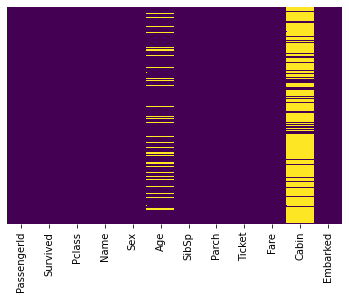

In [10]:
sns.heatmap(boat.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

Yellow Lines are null values from heapmap above

O ---> Dead

1 ---> Survived

In [11]:
boat['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

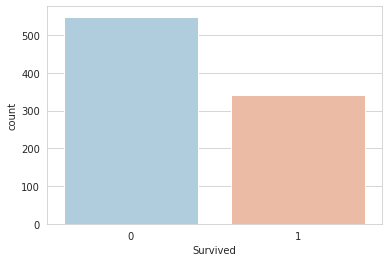

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = boat, palette = 'RdBu_r')    #x axis youre going to give 'Survive' column

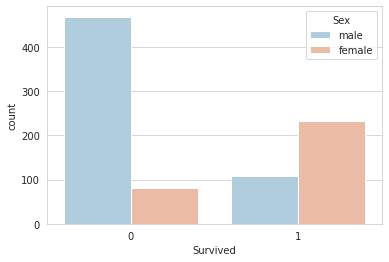

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = boat, hue='Sex', palette = 'RdBu_r')       #hues is further classification of male & female in survived

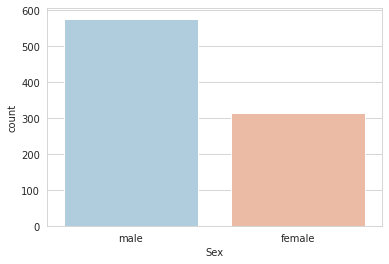

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Sex', data = boat, palette = 'RdBu_r')

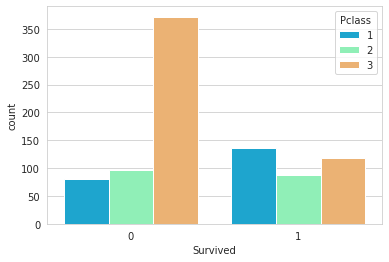

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Pclass', data =boat, palette='rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


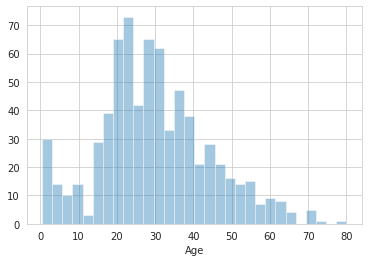

In [16]:
sns.distplot(boat['Age'], kde = False, bins = 30)

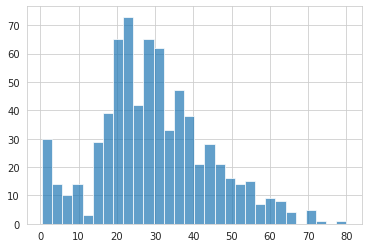

In [17]:
boat['Age'].hist(bins= 30, alpha = 0.7)   #bins are the number of hist lines & alpha makes the line see thru

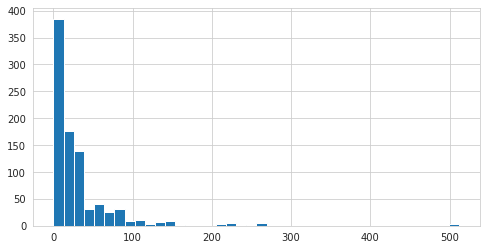

In [18]:
boat['Fare'].hist(bins = 40, figsize =(8,4))

**Data Cleaning**

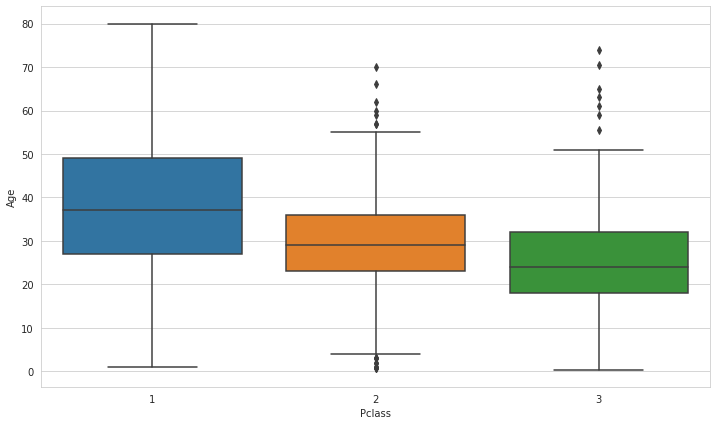

In [19]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y="Age", data = boat)

From the plot above the mean can be derived. Pgclass1 has 37, pgclass2 has 29, pgclass3 has 24

In [20]:
def impute_age(cols):
  Age = cols[0]
  Pclass = [1]
 
  if pd.isnull(Age):
    
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
     return 24

  else:
    return Age

Apply the above Function

In [22]:
boat['Age'] = boat[["Age",'Pclass']].apply(impute_age, axis = 1)


Checking Null/Missing Values

In [24]:
#check null values
boat.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

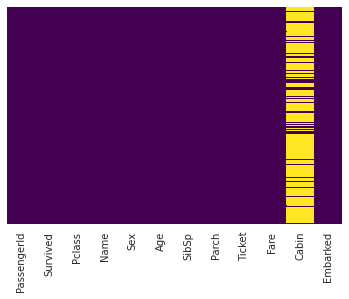

In [28]:
sns.heatmap(boat.isnull(), cmap='viridis', cbar = False, yticklabels = False)

In [30]:
boat.drop('Cabin', axis = 1, inplace = True)

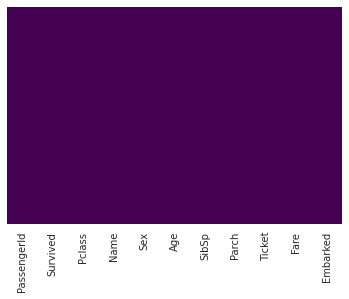

In [31]:
sns.heatmap(boat.isnull(), cmap = 'viridis', cbar =False, yticklabels= False)

In [33]:
boat.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [34]:
boat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
boat.dropna(inplace=True)


Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas

In [36]:
boat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [39]:
boat['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [40]:
pd.get_dummies(boat['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


drop_first: Remove first level to get k-1 dummies out of k categorical levels.

In [49]:
 pd.get_dummies(boat['Embarked'], drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [51]:
 pd.get_dummies(boat['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [52]:
embark =  pd.get_dummies(boat['Embarked'], drop_first = True)
sex =  pd.get_dummies(boat['Sex'],drop_first=True)

In [ ]:
boat.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [58]:
boat.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [60]:
boat = pd.concat([boat,sex,embark],axis = 1)

In [61]:
boat.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Building a Logistic Regression model

In [63]:
X = boat.drop('Survived', axis =1)
Y = boat["Survived"]

In [64]:
print(X)

     PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0              1       3  22.0      1      0   7.2500     1  0  1
1              2       1  38.0      1      0  71.2833     0  0  0
2              3       3  26.0      0      0   7.9250     0  0  1
3              4       1  35.0      1      0  53.1000     0  0  1
4              5       3  35.0      0      0   8.0500     1  0  1
..           ...     ...   ...    ...    ...      ...   ... .. ..
886          887       2  27.0      0      0  13.0000     1  0  1
887          888       1  19.0      0      0  30.0000     0  0  1
888          889       3  24.0      1      2  23.4500     0  0  1
889          890       1  26.0      0      0  30.0000     1  0  0
890          891       3  32.0      0      0   7.7500     1  1  0

[889 rows x 9 columns]


In [65]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


Tarin & Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=101)

In [70]:
print(X.shape, X_train.shape, X_test.shape)

(889, 9) (622, 9) (267, 9)


**Training and Predicting**

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediction for training

In [73]:
boat_train_prediction = model.predict(X_train)

In [74]:
from sklearn.metrics import accuracy_score

In [76]:
score = accuracy_score(Y_train,boat_train_prediction )
print(score)

0.7877813504823151


In [77]:
from sklearn.metrics import confusion_matrix

In [79]:
score_c = confusion_matrix(Y_train, boat_train_prediction)
print(score_c)

[[330  56]
 [ 76 160]]


Prediction for testing


In [80]:
boat_test_prediction = model.predict(X_test)

In [84]:
score_accuracy = accuracy_score(Y_test,boat_test_prediction )
print("Accuracy score of testing moodel is", score_accuracy)

Accuracy score of testing moodel is 0.797752808988764


In [83]:
boat_test_prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [86]:
score_conf = confusion_matrix(Y_test,boat_test_prediction)
score_conf

array([[148,  15],
       [ 39,  65]])

**Evaluation**

We can check precision,recall,f1-score using classification report

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(Y_test,boat_test_prediction))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267

